In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [ ]:
sns.set_theme(style='whitegrid')

Definir área de risco

In [2]:
a_risco = "MORRO DA LUA"

In [3]:
colours = pd.Series({'R1':'#4FC26A','R2':'#F0E113','R3':'#FF8801','R4':'#BF243C'})
colours.name = 'colours'

Importar tabelas do Apex

In [4]:
area_cadastro = pd.read_excel("../data/apex_tables/area_cadastro-2.xlsx")
casa = pd.read_excel("../data/apex_tables/casa.xlsx")
ficha = pd.read_excel("../data/apex_tables/ficha.xlsx")
hierarquia = pd.read_excel("../data/apex_tables/hierarquia.xlsx")

/Users/anabottura/PycharmProjects/FDTE/auto_relatorios/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/anabottura/PycharmProjects/FDTE/auto_relatorios/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/anabottura/PycharmProjects/FDTE/auto_relatorios/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/anabottura/PycharmProjects/FDTE/auto_relatorios/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  w

In [ ]:
print(f"area_cadastro: {area_cadastro.columns}")
print(f"casa: {casa.columns}")
print(f"ficha: {ficha.columns}")
print(f"hierarquia: {hierarquia.columns}")

## Coletar dados para serem usados nos textos

In [5]:
dados_fichas_areas = ficha.merge(area_cadastro,left_on='ID_AREA_FICHA', right_on='ID_CAD_AREA') # juntar dados das areas associadas as fichas

In [6]:
areas_fichas_casas = dados_fichas_areas.merge(casa, right_on='ID_CSA', left_on='ID_CSA_FICHA')
# area_ficha_casa[(area_ficha_casa['RG_RISCO'] == a_risco) & (area_ficha_casa['ENTREVISTA_FICHA'] == 'SIM')]['QTDE_MORADORES_CSA'].sum()
# areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)].groupby(['CLASS_AREA','ENTREVISTA_FICHA'], dropna=False)['QTDE_MORADORES_CSA'].sum().reset_index()
# areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)].groupby(['CLASS_AREA','ENTREVISTA_FICHA'], dropna=False)['ID_FICHA'].count().reset_index()
# areas_fichas_casas

In [7]:
def get_moradores(area_fichas_casas, a_risco, grau_risco):
    
    if grau_risco in areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)]['CLASS_AREA'].unique():
        moradores_resp_risco = area_fichas_casas[(area_fichas_casas['RG_RISCO'] == a_risco)].groupby(['CLASS_AREA','ENTREVISTA_FICHA'], dropna=False)['QTDE_MORADORES_CSA'].sum()
        entrevistas_resp_risco = areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)].groupby(['CLASS_AREA','ENTREVISTA_FICHA'], dropna=False)['ID_FICHA'].count()
        moradores_sim = moradores_resp_risco.loc[grau_risco, 'SIM']
        entrevista_sim = entrevistas_resp_risco.loc[grau_risco, 'SIM']
        entrevista_nao = entrevistas_resp_risco.loc[grau_risco, 'NÃO']
        media_moradores = moradores_sim/entrevista_sim
        total_moradores = round(media_moradores * entrevista_nao) + moradores_sim

    else:
        total_moradores = 0
    return total_moradores

def get_familias(area_fichas_casas, a_risco):
    
    familias_resp_risco = area_fichas_casas[(area_fichas_casas['RG_RISCO'] == a_risco)].groupby(['ENTREVISTA_FICHA'], dropna=False)['QTDE_FAMILIAS_CSA'].sum()
    entrevistas_resp_risco = areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)].groupby(['ENTREVISTA_FICHA'], dropna=False)['ID_FICHA'].count()
    familias_sim = familias_resp_risco.loc['SIM']
    entrevista_sim = entrevistas_resp_risco.loc['SIM']
    entrevista_nao = entrevistas_resp_risco.loc['NÃO']
    media_familias = familias_sim/entrevista_sim
    total_familias = round(media_familias * entrevista_nao) + familias_sim

    return total_familias


In [ ]:
hierarquia_area = hierarquia[hierarquia['NOME'] == a_risco].iat[0,0]
# moradias_defesa - tem que pegar da tabela DEFESA CIVIL
moradias_fdte = dados_fichas_areas[dados_fichas_areas.RG_RISCO == a_risco]['ID_FICHA'].count()
moradores_r1 = get_moradores(areas_fichas_casas, a_risco, 'R1')
moradores_r2 = get_moradores(areas_fichas_casas, a_risco, 'R2')
moradores_r3 = get_moradores(areas_fichas_casas, a_risco, 'R3')
moradores_r4 = get_moradores(areas_fichas_casas, a_risco, 'R4')
total_moradores = moradores_r1+moradores_r2+moradores_r3+moradores_r4
total_familias = get_familias(areas_fichas_casas, a_risco)
total_criancas = areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)]['CRIANCA_CSA'].sum()
total_idosos = areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)]['IDOSO_CSA'].sum()
total_pcds = areas_fichas_casas[(areas_fichas_casas['RG_RISCO'] == a_risco)]['PCD_CSA'].sum()
fichas_sem_id = dados_fichas_areas[(dados_fichas_areas['RG_RISCO'] == a_risco)]['ID_ENTREVISTADO_FICHA'].isna().sum() + \
                dados_fichas_areas[(dados_fichas_areas['RG_RISCO'] == a_risco)]['ID_CSA_FICHA'].isna().sum()

## Plotar gráficos

In [8]:
def define_text_color(patch):
    color_thr = 255*(patch.get_facecolor()[0]*0.299 + patch.get_facecolor()[1]*0.587 + patch.get_facecolor()[0]*0.114)
    if color_thr > 150:
        c = 'black'
    else:
        c = 'white'
    
    return c

def add_bar_labels(ax, labels, pad=-26):
    print(ax.get_position())
    
    for i, rect in enumerate(ax.patches):
        
        c = define_text_color(rect)
            
        bar_height = rect.get_height()
        if bar_height < 30:
            n_pad=2
            c='black'
        else:
            n_pad = pad
        
        ax.text(rect.get_x() + rect.get_width()/2, bar_height+n_pad, labels[i], ha='center', va='baseline', color = c, fontsize=12)

def generate_donut_graph(dados):
    
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
    percentagem = dados/dados.sum()*100
    wedges, text1 = plt.pie(dados, wedgeprops=dict(width=0.5), colors=sns.set_palette('Set2'), startangle=45)
    plt.legend(dados.index, loc='right', bbox_to_anchor=(0, 0., 1.6, 1))

    kw = dict(arrowprops=dict(arrowstyle="-", color='black'), zorder=0, va="center") # propriedades da

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        if percentagem[i] < 5:
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            if percentagem[i] <= 1:
                print(1-percentagem[i])
                ax.annotate('%.0f'%percentagem[i]+'%', xy=(x, y), xytext=(0.95*((i)*0.05+np.sign(x)), 0.95*(y+(i)*0.1)),
                    horizontalalignment=horizontalalignment, **kw)
            else:
                ax.annotate('%.0f'%percentagem[i]+'%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                        horizontalalignment=horizontalalignment, **kw)
        else:
            c = define_text_color(p)
            ax.annotate('%.0f'%percentagem[i]+'%', xy=(0.75*x, 0.75*y), horizontalalignment='center', verticalalignment='center', color=c)
            
    return fig, ax


### Gráfico Classificação de risco das moradias

Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88)


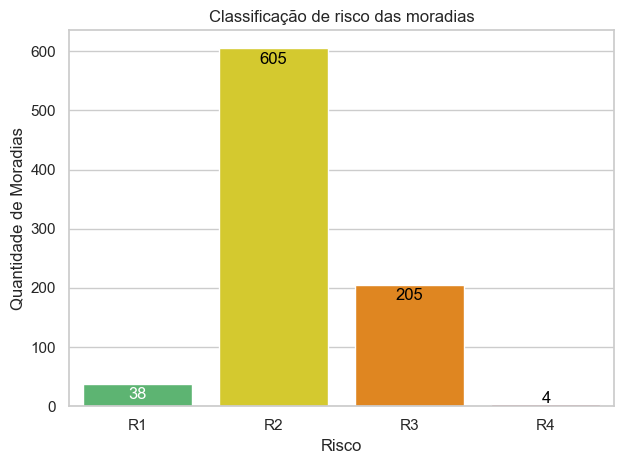

In [9]:
fig = plt.Figure(figsize=(10,5))
dados_risco_moradias = dados_fichas_areas[dados_fichas_areas['RG_RISCO'] == a_risco]
dados_agregados = dados_risco_moradias.groupby(["CLASS_AREA"]).count()['ID_FICHA'].reset_index()
dados_agregados.columns = ['Risco','Quantidade de Moradias']
dados_agregados = pd.merge(dados_agregados, colours, left_on='Risco', right_index=True)
sns.set_theme(style='whitegrid')
ax = sns.barplot(dados_agregados, x='Risco', y='Quantidade de Moradias', hue='colours', palette=list(dados_agregados['colours']), legend=False)
ax.set_title('Classificação de risco das moradias')
add_bar_labels(ax, dados_agregados['Quantidade de Moradias'])
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/risco_moradias.png')

### Gráfico Quantidade de Moradias por setor de risco

Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88)


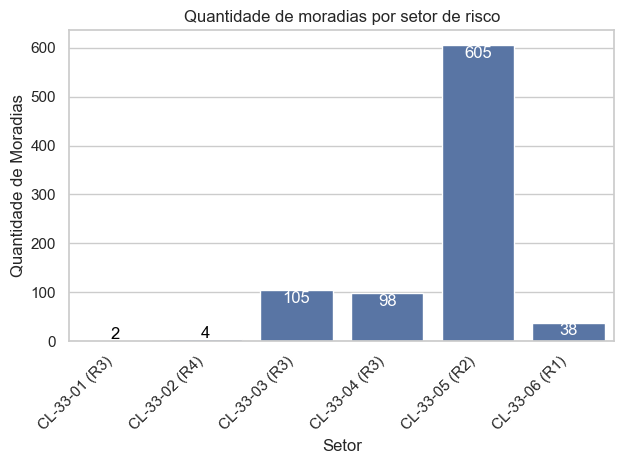

In [12]:
fig = plt.Figure(figsize=(10,5))
dados_risco_moradias = dados_fichas_areas[dados_fichas_areas['RG_RISCO'] == a_risco]
dados_agregados = dados_risco_moradias.groupby(["SETOR"]).count()['ID_FICHA'].reset_index()
dados_agregados.columns = ['Setor','Quantidade de Moradias']
sns.set_theme(style='whitegrid')
ax = sns.barplot(dados_agregados, x='Setor', y='Quantidade de Moradias')
ax.set_title('Quantidade de moradias por setor de risco')
plt.xticks(rotation = 45, horizontalalignment='right')
add_bar_labels(ax, dados_agregados['Quantidade de Moradias'])
dados_agregados
# fig.canvas.draw()
# r = fig.canvas
# r
plt.tight_layout()
# ax.get_figure().savefig('../data/html_outputs/images/moradias_por_setor.png')

In [ ]:
dados_risco_moradias.groupby(["SETOR"]).count()['ID_FICHA'].reset_index()

### Gráfico Tipo de uso dos imoveis

In [ ]:
fig = plt.Figure(figsize=(10,5))
uso_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('USO_CSA', dropna=False)['ID_FICHA'].count()
uso_csa = uso_csa.sort_values(ascending=False)
fig, ax = generate_donut_graph(uso_csa)
ax.set_title('Tipo de uso dos imóveis', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/uso_imoveis.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
acab_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('ACAB_CSA', dropna=False)['ID_FICHA'].count()
fig, ax = generate_donut_graph(acab_csa)
ax.set_title('Nível do acabamento das moradias', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/acab_imoveis.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
acab_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('TIPO_CSA', dropna=False)['ID_FICHA'].count()
acab_csa = acab_csa.sort_values(ascending=False)
fig, ax = generate_donut_graph(acab_csa)
ax.set_title('Tipologia das moradias', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/tipologia_imoveis.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
piso_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('PISO_CSA', dropna=False)['ID_FICHA'].count()
piso_csa = piso_csa.sort_values(ascending=False)
fig, ax = generate_donut_graph(piso_csa)
ax.set_title('Tipo de piso', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/tipo_piso.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
telhado_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('TELHADO_CSA', dropna=False)['ID_FICHA'].count()
telhado_csa = telhado_csa.sort_values(ascending=False)
fig, ax = generate_donut_graph(telhado_csa)
ax.set_title('Tipo de cobertura', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/tipo_telhado.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
probl_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('PROB_ESTRU_CSA', dropna=False)['ID_FICHA'].count()
probl_csa = probl_csa.sort_values(ascending=False)
fig, ax = generate_donut_graph(probl_csa)
ax.set_title('Há riscos estruturais nas moradias?', position=(0.8, 1))
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/probl_imoveis.png', bbox_inches='tight')

In [ ]:
fig = plt.Figure(figsize=(10,5))
npavmto_csa = areas_fichas_casas[areas_fichas_casas['RG_RISCO'] == a_risco].groupby('NPVTO_CSA', dropna=False)['ID_FICHA'].count().reset_index()
npavmto_csa
npavmto_csa.columns = ['Número de pavimentos','Quantidade de Moradias']
ax = sns.barplot(npavmto_csa, x='Número de pavimentos', y='Quantidade de Moradias')
ax.set_title('Quantidade de pavimentos')
add_bar_labels(ax, npavmto_csa['Quantidade de Moradias'], pad=-20)
plt.tight_layout()
ax.get_figure().savefig('../data/html_outputs/images/pav_imoveis.png', bbox_inches='tight')